# HOUSING PRICE

1. The first question in a machine learning project to ask is: What is the business objective?

2. We use the California Housing Prices dataset. This data has metrics such as the population, median income, median housing
price, and so on for each block group in California.
The model we build will to predict the median housing price in any district, given all the other metrics.

3. It obviously is a SUPERVISED LEARNING, to be more specific, REGRESSION problem. Also there is no continuous flow of data to come to the system and the data is small, BATCH learning shpuld be fine!

4. The metric we use to measure the performance of the model is root mean squared error (RMSE).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA 

In [3]:
housing = pd.read_csv("housing.csv")


In [7]:
# the first 4 examples
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [10]:
# There are 10 features and 20640 examples
# all features have 20640 non-null values except total_bedroom feature! some data are MISSING
# all features are numeric except ocean_proximity which is CATEGORICAL
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Some info about numeric features. Some of them does not make sense!
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
#Categories in categorical feature
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

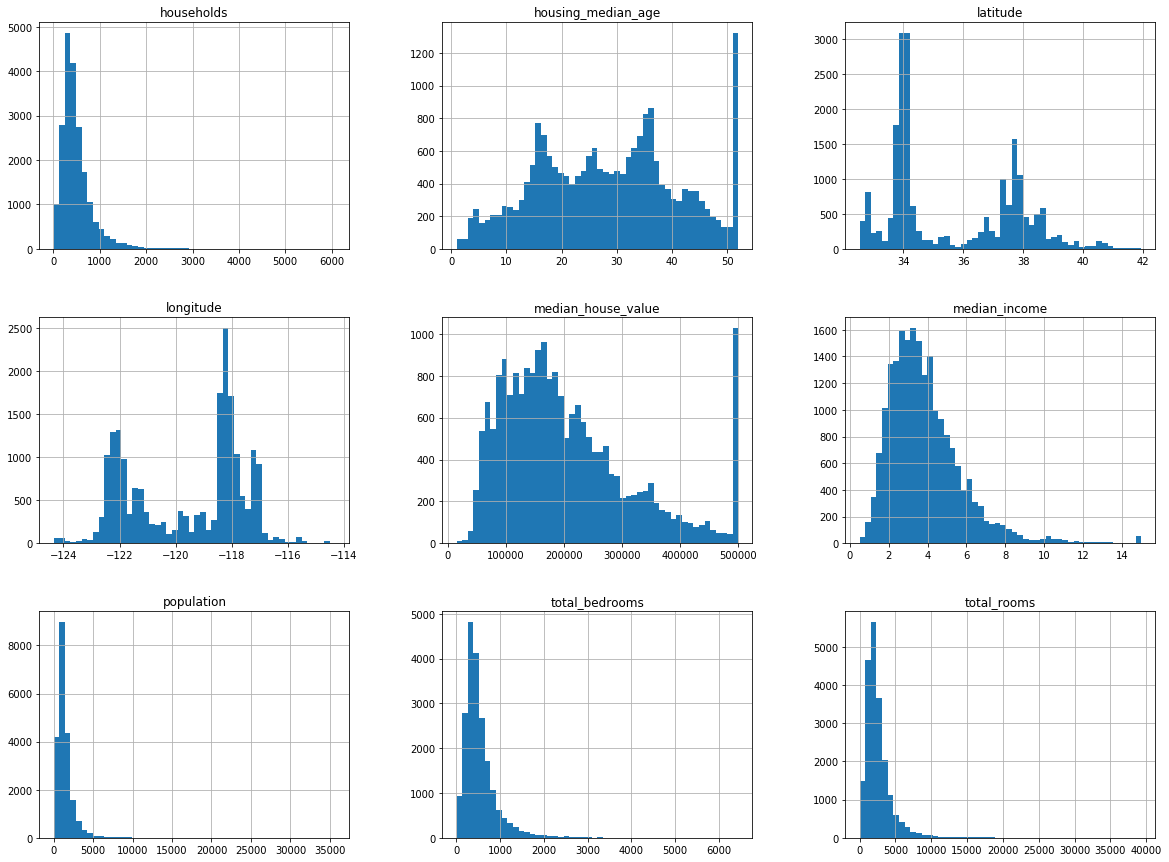

In [32]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Splitting the data into train and test set

In [40]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

median income is important to predict median housing prices. We categorize it to five bins using a new feature called income_cat using labels 1, 2, 3, 4, and 5.

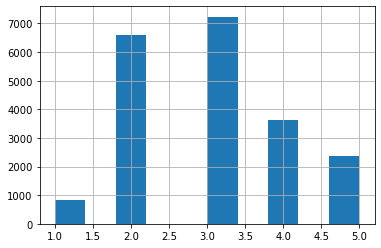

In [12]:
housing["incom_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing["incom_cat"].hist()

We now split the data in order to have all categories of incom_cat in test and training data.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["incom_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["incom_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: incom_cat, dtype: int64

We do not need incom_cat feature anymore, so we can remove it!

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("incom_cat", axis=1, inplace=True)

# Plots

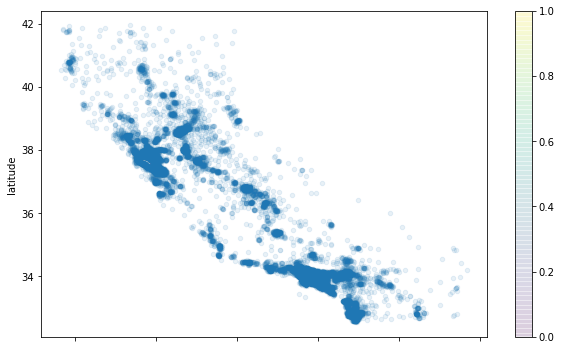

In [20]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.1, figsize=(10,6), colorbar=True)

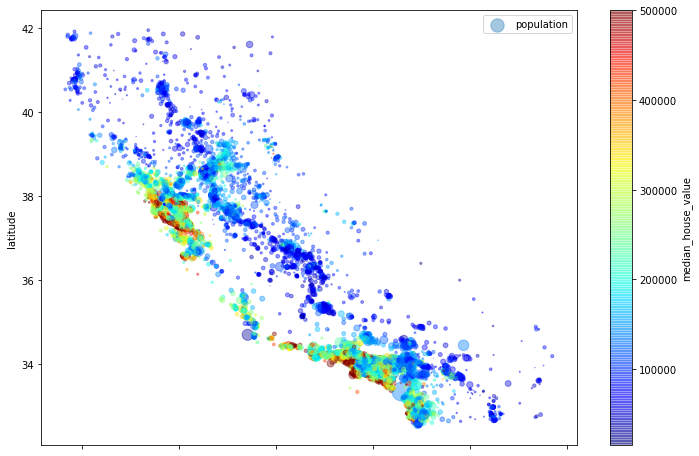

In [22]:
housing.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.4, s=housing["population"]/100,
            label="population", figsize=(12,8), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Correlation between features

In [59]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [60]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002899CFBF470>,
      dtype=object)

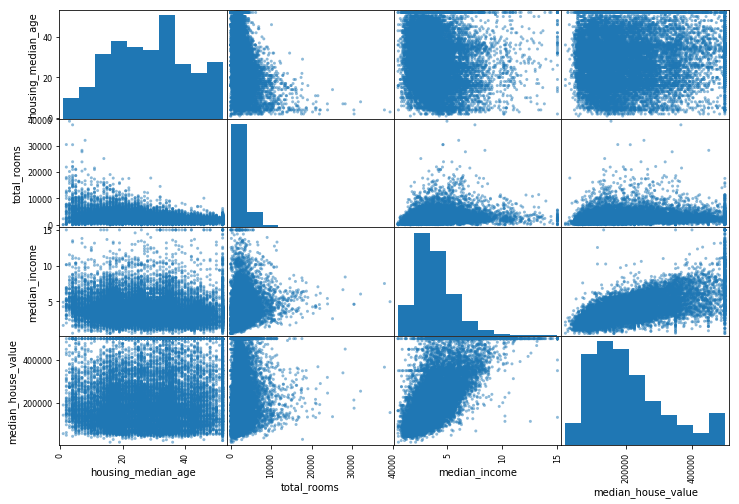

In [64]:
from pandas.plotting import scatter_matrix
att = ["housing_median_age", "total_rooms", "median_income", "median_house_value"]
scatter_matrix(housing[att], figsize=(12,8))

# Feature engineering

In [65]:
housing['room_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [66]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Data preparing

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)         # FEATURES
housing_labels = strat_train_set["median_house_value"].copy()        # TARGET

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [27]:
# median can be computed on numerical features. We drop Categorical feature
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# Categorical feature

In [30]:
housing_cat = housing[["ocean_proximity"]]

In [31]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


# Transformer

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [33]:
class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        room_per_households = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, households_ix]
            return np.c_[X, room_per_households, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, room_per_households, population_per_household]
            

In [34]:
attr_adder = CombineAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attrbs = attr_adder.transform(housing.values)

# Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy='median')),
                        ('attr_adder', CombineAttributeAdder()), 
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [36]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs ),
                                  ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
np.shape(housing_prepared)

(16512, 16)

# Model Training

We train linear regression, decission tree, and random forest algorithms. It is possible to apply other machine learning algorithms.

1. Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [72]:
# low R^2 error on training set is indication of underfitting
print("The R^2 score for linear regression is: {} ".format(lin_reg.score(housing_prepared, housing_labels)))

The R^2 score for linear regression is: 0.6452517082635718 


2. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
# Perfect score indicates the overfitting! 
print("The R^2 score for linear regression is: {} ".format(tree_reg.score(housing_prepared, housing_labels)))

The R^2 score for linear regression is: 1.0 


# Cross Validation 

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="r2", cv=10)
scores

array([0.5930848 , 0.65937116, 0.62229066, 0.63237716, 0.63930823,
       0.58270697, 0.58717416, 0.65495085, 0.57736751, 0.63539092])

In [76]:
# cross validation on decision tree does NOT better than linear regression
print("Mean of R^2 score using 10 fold cross validation for decission tree is:", scores.mean())

Mean of R^2 score using 10 fold cross validation for decission tree is: 0.6184022411255757


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="r2", cv=10)
lin_scores 

array([0.62036771, 0.670995  , 0.63674694, 0.59584477, 0.64800185,
       0.63145941, 0.67843925, 0.65907694, 0.61876932, 0.64337325])

In [77]:
# NOT BETTER THAN LINEAR REGRESSION 
print("Mean of R^2 score using 10 fold cross validation for linear regression is:", lin_scores.mean())

Mean of R^2 score using 10 fold cross validation for linear regression is: 0.6403074433420473


# RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
print("The R^2 score for random forest is: {} ".format(forest_reg.score(housing_prepared, housing_labels)))

The R^2 score for random forest is: 0.9736962135914953 


In [79]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="r2", cv=10)
print("Mean of R^2 score using 10 fold cross validation for random forest is:", forest_scores.mean())

Mean of R^2 score using 10 fold cross validation for random forest is: 0.8090155701589735


It seems random forest is also overfitting. Lets find the best hyperparameters using grid search!

# Grid Search Cross Validation

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg =RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="r2", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [66]:
# best parameters chosen by grid search
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [82]:
forest_reg1 = RandomForestRegressor(max_features=6, n_estimators=30)
forest_reg1.fit(housing_prepared, housing_labels)
print("The R^2 score for random forest using best parameters of grid search is: {} "
      .format(forest_reg1.score(housing_prepared, housing_labels)))

The R^2 score for random forest using best parameters of grid search is: 0.9717147649524203 


Test the model on test set

In [83]:
#final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_prediction = forest_reg1.predict(X_test_prepared)
forest_reg1.score(X_test_prepared, y_test)

0.8238456986627474

Using best parameter of grid search, we get R^2 = 0.8238456986627474 which is low compare to R^2 on training set.
It is an indication of high variance. The possible remedy is 

simplify the model

or

regularize the model

or 

get more training data.